# AB testing lab

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#merge-demo—expiriment-tables" data-toc-modified-id="merge-demo—expiriment-tables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>merge demo—expiriment tables</a></span></li></ul></div>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
dfdemo=pd.read_csv('/Users/AFROARC/Documents/GitHub/BCNDATA1021/ClassMaterials/Week6/AB_Testing/df_final_demo.txt')

In [107]:
dfexp=pd.read_csv('/Users/AFROARC/Documents/GitHub/BCNDATA1021/ClassMaterials/Week6/AB_Testing/df_final_experiment_clients.txt')

In [108]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [109]:
dfexp.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


## merge demo—expiriment tables

In [110]:
dfmerge=dfdemo.merge(dfexp,on='client_id',how='left')

In [111]:
dfmerge

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [112]:
#dfmerge.plot.bar();

In [113]:
dfmerge.isna().sum()

client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
Variation           20109
dtype: int64

In [114]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.9+ MB


In [115]:
dfmerge["Variation"].fillna("no_test", inplace = True)

In [116]:
dfmerge.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
Variation            0
dtype: int64

In [117]:
dfmerge.dropna()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,no_test
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,no_test
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,no_test
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,no_test


In [118]:
dfmerge.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
Variation            0
dtype: int64

In [119]:
dfmerge.reset_index(drop=True, inplace=True)

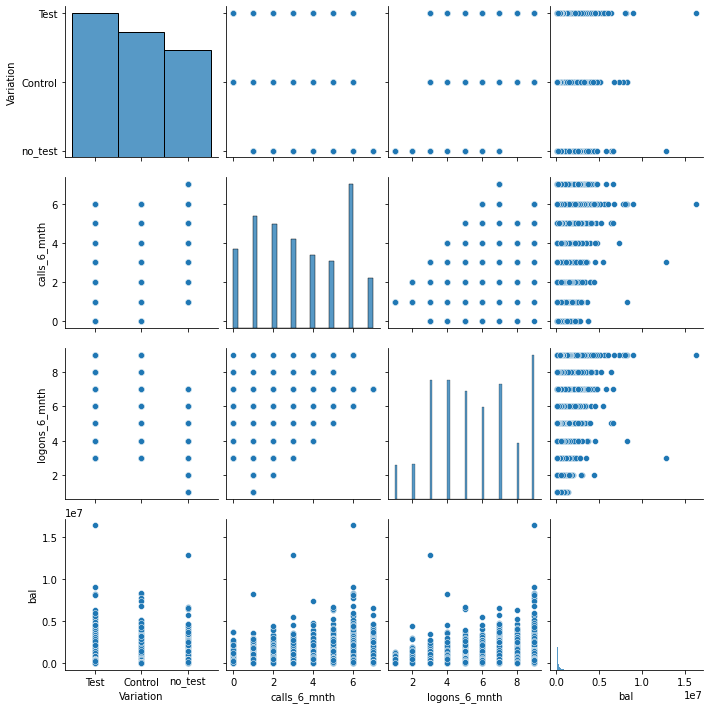

In [122]:
sns.pairplot(dfmerge, vars=['Variation','calls_6_mnth','logons_6_mnth','bal']);

<AxesSubplot:>

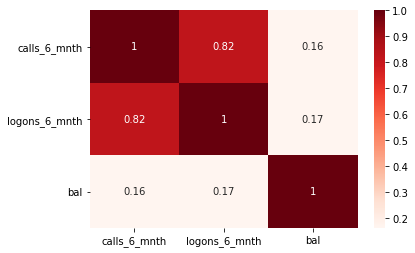

In [124]:
sns.heatmap(dfmerge[['Variation','calls_6_mnth','logons_6_mnth','bal']].corr(), annot=True, cmap = 'Reds')

In [126]:
dfmerge.plot.pie(y='Variation', figsize=(5, 5))

TypeError: '<' not supported between instances of 'str' and 'int'